# Solución de un problema de regresión lineal

En este tutorial conocerás como preparar datos, crear un modelo de regresión lineal, entrenarlo y, finalmente, evaluarlo con algunas métricas de rendimiento. Particularmente, veremos cómo realizar los siguientes procesos:

1. Importar las librerías necesarias.
2. Cargar un conjunto de datos.
3. Preparar los datos para el modelado.
4. Entrenar un modelo de regresión lineal.
5. Evaluar el modelo resultante.

Utilizaremos el conjunto de datos correspondiente a la caracterización de casas y su precio. Nuestro objetivo es, entonces, obtener un modelo que sea capaz de predecir el precio de una vivienda dadas sus características.

## 1. Importación de librerías requeridas

Importaremos la librería Pandas y, además, utilizaremos la librería `scikit-learn`. Esta librería contiene múltiples funciones y objetos para todas las etapas en un proceso de machine learning. En particular, usaremos:

* `train_test_split`: función para la separación del conjunto de datos en subconjuntos de entrenamiento y pruebas.
* `LinearRegression`: objeto para crear y entrenar el modelo de regresión lineal.
* `mean_squared_error`: función que retorna el error cuadrático medio.
* `root_mean_squared_error`: función que retorna la raíz del error cuadrático medio.
* `mean_absolute_error`: función que retorna el error absoluto medio.
* `r2_score`: función que retorna el coeficiente de determinación R<sup>2</sup>.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

from importlib.metadata import version

Revisión de versiones

In [2]:
print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Scikit-learn: {version('scikit-learn')}")

Versión de Pandas: 2.3.1
Versión de Scikit-learn: 1.7.1


## 2. Carga de datos

Realizaremos la carga de datos usando la función de Pandas `read_csv()`. En este caso agregaremos un nuevo parámetro para especificar el separador del archivo que, para nuestro conjunto de datos, es una coma:

In [3]:
data_raw = pd.read_csv('kc_house_data.csv', sep=',')

Veremos el tamaño de los datos usando `shape`:

In [4]:
data_raw.shape

(21613, 21)

Y los primeros datos del conjunto usando `head()`:

In [5]:
data_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Preparación de los datos

Antes de entrenar cualquier modelo de aprendizaje automático, es importante asegurar que los datos utilizados no contienen errores, como datos faltantes o duplicados. Para esto es recomendable usar una nueva variable, en este caso `data`, que usaremos para almacenar un conjunto de datos modificado:

In [6]:
data = data_raw.copy()

### Eliminación de datos faltantes

Usualmente, los datos obtenidos de procesos o escenarios reales no son perfectos. Por ejemplo, se pueden presentar casos en donde algunos valores no se guardan, no se miden o no se almacenan correctamente. En esos casos se debe evaluar si es posible reemplazar el valor (usando valores medios, por ejemplo) o si, por el contrario, simplemente es mejor eliminar todo el dato (es decir, toda la fila).

Utilizando la función `isna()` sobre nuestro DataFrame, obtendremos la evaluación de un condicional particular, que retorna `True` si la celda está vacía. Con Pandas, una celda se considera "vacía" si su valor es `None` o un valor numérico inválido (`numpy.NaN`). Es importante resaltar que una celda con un String vacío (`''`) no se considera vacía, por lo que `isna()` retornaría `False` en ese caso.

In [7]:
data.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Si adicionamos la función `sum()`, obtendremos la cantidad de datos faltantes por variable:

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Como se puede observar, nuestro conjunto de datos no contiene datos faltantes. Recuerda que siempre es necesario verificar si tus datos tienen valores faltantes, ya que debes tratarlos antes de entrenar tu modelo.

### Eliminación de duplicados

Otro posible error que puede suceder en un conjunto es la repetición de datos (en el caso de un DataFrame, serían filas repetidas). El principal problema es que, si se tienen muchos datos repetidos al realizar el entrenamiento, el modelo resultante no podrá generalizar correctamente cuando deba evaluar datos nuevos, sino que estará sobreajustado o sesgado hacia los datos duplicados.

Similar al caso anterior, usaremos la función `duplicated()` para obtener el resultado de una consulta especial, que retorna `True` si la fila es una copia de otra. Específicamente, esta función va verificando las filas en orden, retornando `False` si ve una fila por primera vez. Si en algún momento encuentra una fila que ya ha visto, marcará la fila actual como `True`, pero no hará nada con la fila original. Este es el resultado en nuestro conjunto de datos:

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

Si agregamos `sum()`, obtendremos el número de filas duplicadas:

In [10]:
data.duplicated().sum()

np.int64(0)

Al igual que con los datos faltantes, nuestro conjunto de datos tampoco tiene duplicados. Después de verificar el conjunto de datos, veremos la cantidad de filas resultantes usando `shape`, aunque en nuestro caso mantenemos todos los datos: 

In [11]:
data.shape

(21613, 21)

### Eliminación de variables poco relevantes

Al entrenar un modelo de regresión lineal, buscamos una relación entre la variable objetivo y las variables independientes. Sin embargo, debemos tener en cuenta el contexto de nuestros datos, para así evitar crear relaciones poco relevantes para el problema, o mantener variables que dan información redundante. En este caso, eliminaremos tres variables con poca relevancia para el precio de las viviendas: `id`, `date` y `zipcode`.

Para eliminarlas, usaremos la función `drop()` sobre nuestro DataFrame y le asignaremos el resultado a sí mismo, sobreescribiendo su contenido. Ten en cuenta que el parámetro `axis="columns"` indica que realizaremos esta acción sobre las columnas:

In [12]:
data = data.drop(['id','date','zipcode'], axis="columns")

Veremos el resultado con `data.head()`:

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## 4. Entrenamiento de un modelo de regresión lineal

Con los datos preparados, ahora podemos entrenar nuestro modelo de regresión lineal. Lo primero que realizaremos será dividirlos en dos subconjuntos para, posteriormente, entrenar el modelo.

### División de datos

**Nota importante**: es muy importante dividir el conjunto de datos **antes** de realizar cualquier transformación u operación.

Primero tenemos que dividir el conjunto de datos resultante en dos: uno utilizado para el entrenamiento y otro utilizado para las pruebas. Puedes decidir qué proporción de datos asignar a cada conjunto, por ejemplo, para este modelo usaremos el 80% de los datos para entrenar el modelo y el 20% restante para probarlo. Específicamente, haremos uso de la función `train_test_split()` con los siguientes parámetros: 

* `arrays`: el arreglo (o arreglos) de datos. En este caso es nuestra variable `data`.
* `test_size=0.2`: la proporción de datos de pruebas. Debe ser un valor entre 0 y 1. Como queremos el 20%, usaremos el valor `0.2`.
* `random_state=9`: la semilla utilizada para reorganizar los datos, representada por un número entero. Si se usa la misma semilla, siempre se obtendrá el mismo resultado, en vez de ser completamente aleatorio.

In [14]:
train, test = train_test_split(data, test_size=0.2, random_state=9)
train.head()    

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
17690,1364000.0,4,2.50,3560,8960,2.0,0,0,3,10,3560,0,2001,0,47.6903,-122.213,1660,7680
7711,815000.0,3,2.50,2415,2186,2.0,0,1,3,9,2415,0,1981,0,47.6506,-122.202,2660,2165
7878,205000.0,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,47.4857,-122.221,1420,6631
5409,439950.0,4,2.25,2780,15075,2.0,0,0,3,7,2780,0,1985,0,47.4770,-122.116,1650,25542
10047,362362.0,2,1.00,710,4000,1.0,0,0,3,6,710,0,1909,0,47.5535,-122.269,960,4000


Es importante resaltar que, para los algoritmos supervisados implementados en `scikit-learn`, es necesario que las variables de entrada estén separadas de la variable objetivo. En este caso nuestra variable objetivo es el precio, por lo que la aislaremos de las demás.

Para esto usaremos la función `drop` y asignaremos el resultado a `x_train`, que representa los valores de las variables independientes del conjunto de entrenamiento. Por otro lado, asignaremos la misma columna que eliminamos a otra variable, `y_train`, que representa los valores de la variable dependiente del conjunto de entrenamiento:

In [15]:
x_train = train.drop(['price'],axis=1)
y_train = train['price']

Podemos verificar que nuestro vector de variables X no contiene la variable `price`:

In [16]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
17690,4,2.50,3560,8960,2.0,0,0,3,10,3560,0,2001,0,47.6903,-122.213,1660,7680
7711,3,2.50,2415,2186,2.0,0,1,3,9,2415,0,1981,0,47.6506,-122.202,2660,2165
7878,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,47.4857,-122.221,1420,6631
5409,4,2.25,2780,15075,2.0,0,0,3,7,2780,0,1985,0,47.4770,-122.116,1650,25542
10047,2,1.00,710,4000,1.0,0,0,3,6,710,0,1909,0,47.5535,-122.269,960,4000


Además, verificaremos que nuestra variable Y solamente contiene los precios:

In [17]:
y_train

17690    1364000.0
7711      815000.0
7878      205000.0
5409      439950.0
10047     362362.0
           ...    
4673     1035000.0
5014      764000.0
9979      342000.0
501       475000.0
20828    1900000.0
Name: price, Length: 17290, dtype: float64

### Entrenamiento del modelo

Ahora podemos entrenar el modelo con los datos modificados. Inicialmente crearemos un objeto de tipo `LinearRegression()`:

In [18]:
regresion = LinearRegression()

A continuación entrenamos el modelo utilizando el conjunto de entrenamiento, que separamos previamente en las variables independientes `x_train` y la variable objetivo `y_train`:

In [19]:
regresion.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


El resultado del entrenamiento son los coeficientes y el intercepto que definen una recta. Recuerda que hay un coeficiente para cada variable, que define una relación proporcional entre ella y la variable objetivo:

In [20]:
print (f'Coeficientes: {regresion.coef_}')
print (f'Intercepto: {regresion.intercept_}')

Coeficientes: [-3.16869039e+04  4.37264750e+04  1.03923657e+02  1.46622147e-01
  1.85589938e+03  5.84669857e+05  5.03190435e+04  3.18388832e+04
  9.61197844e+04  6.97205540e+01  3.42031035e+01 -2.51437210e+03
  2.31459792e+01  5.60634909e+05 -1.19632335e+05  3.23288786e+01
 -4.16535065e-01]
Intercepto: -37052163.81618162


Podemos ver qué coeficiente le corresponde a cada variable utilizando el método `zip()`, que retorna tuplas con los elementos de cada parámetro. En este caso, usaremos el nombre de las variables (que obtendremos usando el atributo `columns` de la variable `x_train`) y los coeficientes de la regresión, y crearemos una tabla con el resultado con `pd.DataFrame`:

In [21]:
pd.DataFrame(zip(x_train.columns, regresion.coef_),columns=["Variable","Coeficiente"])

,Variable,Coeficiente
0,bedrooms,-31686.903875
1,bathrooms,43726.474985
2,sqft_living,103.923657
3,sqft_lot,0.146622
4,floors,1855.899380
5,waterfront,584669.857220
6,view,50319.043548
7,condition,31838.883214
8,grade,96119.784443
9,sqft_above,69.720554


Por ejemplo, la variable `floors` tiene un coeficiente asociado de 1855.89, y la variable `yr_renovated` tiene un coeficiente asociado de 23.14.

## 5. Evaluación del modelo

Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo, es decir, cómo se ajusta a los datos. Lo primero que haremos es dividir nuestro conjunto de pruebas de la misma forma como dividimos el conjunto de entrenamiento. Es decir, separaremos la variable objetivo usando `drop()`, y asignaremos esta variable a `y_test`:

In [22]:
x_test = test.drop(['price'],axis="columns")
y_test = test['price']

A continuación realizaremos predicciones sobre el conjunto de pruebas, con el fin de compararlas con los valores reales que almacenamos en `y_test`. Utilizaremos la función `predict()` sobre el modelo, pasando como parámetro los valores de las variables dependientes del conjunto de pruebas `x_test`. Es decir, para cada dato, le entregaremos al modelo los valores de las variables independientes, y el modelo retornará un valor de la variable objetivo calculado con los coeficientes y el intercepto. El arreglo de predicciones resultante, `y_pred`, nos será de utilidad para calcular las siguientes métricas:

1. **Raíz del error cuadrático medio (RMSE):** usaremos `mean_squared_error()` y pasaremos los datos reales y las predicciones como parámetros. El parámetro `squared` nos permite escoger entre el error cuadrático medio (que tiene unidades cuadradas de los datos pasados por parámetro, en este caso USD<sup>2</sup>) y su raíz (que tiene las mismas unidades de los datos pasados por parámetro, en este caso USD).
2. **Error absoluto medio (MAE):** usaremos `mean_absolute_error()` y pasaremos los datos reales y las predicciones como parámetros.
3. **Coeficiente de determinación (R<sup>2</sup>):** usaremos `r2_score()`, con los mismos datos que en las métricas anteriores.

In [23]:
y_pred = regresion.predict(x_test)
print(y_pred)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f'R²: {r2_score(y_test, y_pred):.2f}')

[ 158255.41992529  437247.79468201  399976.79993176 ... 1258342.92069671
  167502.23814128  221961.08694704]
RMSE: 200731.58
MAE: 126120.34
R²: 0.71


Con base en estas métricas, podemos decir que la raíz del error cuadrático promedio en las predicciones es de 200,731.58 USD, y que el error absoluto promedio en las predicciones es de 126,388.47 USD. Un error promedio en el orden de los cientos de miles de dólares puede parecer muy alto, aunque nuestro R<sup>2</sup> nos indica que nuestro modelo se ajusta un 71% a los datos.

Una vez determinado el rendimiento de generalización utilizando el conjunto de pruebas, podemos tomar todos los datos y entrenar el modelo final. Seguiremos el mismo procedimiento, primero aislando la variable objetivo:

In [24]:
x = data.drop(['price'],axis=1)
y = data['price']

Utilizaremos el mismo objeto de regresión lineal para entrenar el modelo:

In [25]:
regresion.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Y obtendremos los coeficientes y el intercepto del modelo final:

In [26]:
print (f'Coeficientes: {regresion.coef_}')
print (f'Intercepto: {regresion.intercept_}')

Coeficientes: [-3.41516691e+04  4.21617075e+04  1.08722972e+02  1.27416302e-01
  7.60688060e+02  5.87847215e+05  4.94292277e+04  3.10318017e+04
  9.72193692e+04  7.07908516e+01  3.79321196e+01 -2.45627635e+03
  2.15324371e+01  5.61060482e+05 -1.17020859e+05  2.74311971e+01
 -3.93287863e-01]
Intercepto: -36862616.467943855


Finalmente, veremos qué coeficiente le corresponde a cada variable:

In [27]:
pd.DataFrame(zip(x.columns, regresion.coef_),columns=["Variable","Coeficiente"])

,Variable,Coeficiente
0,bedrooms,-34151.669113
1,bathrooms,42161.707505
2,sqft_living,108.722972
3,sqft_lot,0.127416
4,floors,760.688060
5,waterfront,587847.215242
6,view,49429.227698
7,condition,31031.801737
8,grade,97219.369206
9,sqft_above,70.790852


In [28]:
x_test = test.drop(['price'],axis="columns")
y_test = test['price']

In [29]:
y_pred = regresion.predict(x_test)
print(y_pred)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f'R²: {r2_score(y_test, y_pred):.2f}')

[ 157042.37952529  438000.06702288  398571.39085934 ... 1262835.56997807
  168189.74270424  215649.92308873]
RMSE: 200322.12
MAE: 126388.47
R²: 0.71


## Cierre

En este tutorial hemos utilizado Pandas para preparar nuestro conjunto de datos, de forma que podamos entrenar un modelo de regresión lineal mediante scikit-learn. Adicionalmente, realizamos predicciones con el modelo resultante y calculamos tres métricas de rendimiento sobre los resultados. 

---
Para la separación de datos con `train_test_split()` puedes consultar [este enlace](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Para más información sobre regresión lineal con `LinearRegression()` puedes consultar [este enlace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Finalmente, para obtener más información sobre los errores en `scikit_learn` puedes consultar: [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) y [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

---
*Creado por: Nicolás Díaz*

*Última edición: Camilo Rozo*

*Revisado por: Haydemar Nuñez*

*Versión de: Enero 20, 2025*  

*Universidad de los Andes*  

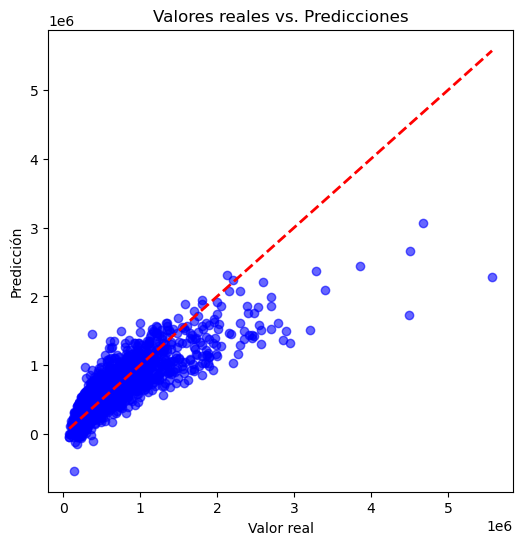

In [31]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)  # línea ideal
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Valores reales vs. Predicciones")
plt.show()

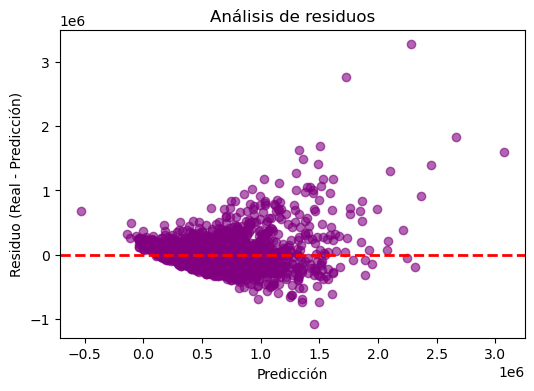

In [32]:
residuos = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color="purple")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicción")
plt.ylabel("Residuo (Real - Predicción)")
plt.title("Análisis de residuos")
plt.show()

In [41]:
residuos = y_test - y_pred
residuos

2463     103744.580075
13901    156529.205318
14693      5023.200068
10530    -79404.793219
18104     83747.210155
             ...      
7516      61530.314280
11745     48411.551564
691      226557.079303
19712     95497.761859
11775    -53961.086947
Name: price, Length: 4323, dtype: float64

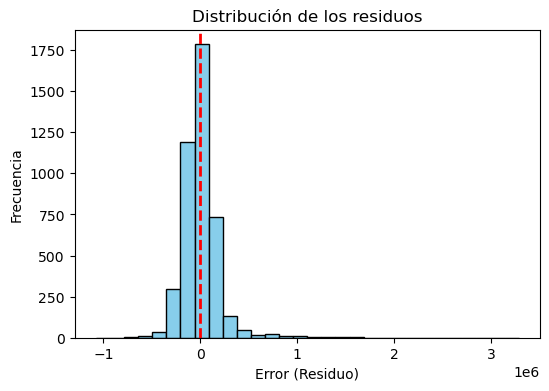

In [37]:
plt.figure(figsize=(6,4))
plt.hist(residuos, bins=30, color="skyblue", edgecolor="black")
plt.axvline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

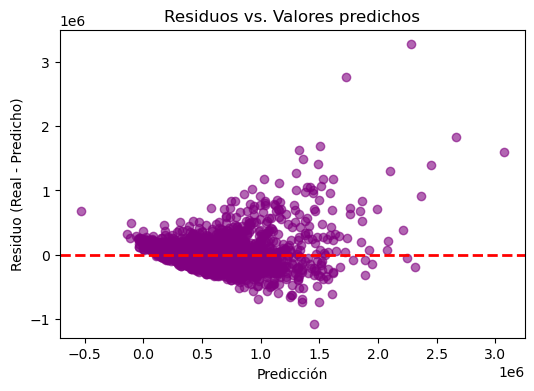

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color="purple")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicción")
plt.ylabel("Residuo (Real - Predicho)")
plt.title("Residuos vs. Valores predichos")
plt.show()